In [1]:
import inspect
import gc
import random
import torch
import torch.nn.init as init
import torch.nn as nn
import torch.nn.functional as F
import Functional_Data_functions 
from Functional_Data_functions import Compare_epochs,Compile_class,conv_total_out_no_pool,conv_total_out_without_pooling, conv_total_out_une_couche, TSConv1d,TSConv1d_hyperparam, Granulator, rm_tensor ,Hyperparameter_Test_n_data,LSTM_class,conv_total_out, Smoothing_method,weights_init_normal,HyperParameters,Hyperparameter_Search,Hyperparameter_Test,Hyper_parameter_GridSearch,TSCNN,Compile_train,Compare_epochs, from_torch_to_Datagrid, conv_block_out_lp,Window_Maker, row_column_scaler
from missforest.miss_forest import MissForest

import skfda
from skfda import FDataGrid as fd
from skfda.representation.basis import BSpline as B
import xgboost as xbg 
from xgboost import XGBClassifier, plot_tree,XGBRegressor
import yfinance as yf
from scipy.stats import norm
from skfda.representation.basis import VectorValued as MultiBasis
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import save_image
import pandas as pd
import numpy as np
from numpy import *
import seaborn as sns
import matplotlib
#matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

import scipy
from scipy.interpolate import BSpline
import os
import ignite
from tqdm import tqdm
import sklearn
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as scale
import random
from random import seed
from scipy import stats
import statistics
from statistics import stdev
from Data_extractor import extract_API


488
Symbole pour l'or : GC=F
GC=F
[*********************100%%**********************]  1 of 1 completed
BZ=F
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BZ=F']: Exception('%ticker%: No price data found, symbol may be delisted (period=3d)')



CAD=X
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAD=X']: Exception('%ticker%: No price data found, symbol may be delisted (period=3d)')



CL=F
[*********************100%%**********************]  1 of 1 completed
HG=F
[*********************100%%**********************]  1 of 1 completed
TFC
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TFC']: Exception('%ticker%: No price data found, symbol may be delisted (period=3d)')



HG=F
[*********************100%%**********************]  1 of 1 completed
EUR=X
[*********************100%%**********************]  1 of 1 completed
JPY=X
[*********************100%%**********************]  1 of 1 completed
GBP=X
[*********************100%%**********************]  1 of 1 completed
ZW=F
[*********************100%%**********************]  1 of 1 completed
QM=F
[*********************100%%**********************]  1 of 1 completed
^FCHI
[*********************100%%**********************]  1 of 1 completed
SPY
[*********************100%%**********************]  1 of 1 completed
                          Symbole         Open         High          Low  \
2023-11-07 00:00:00-05:00    GC=F  1977.800049  1977.900024  1977.800049   
2023-11-07 00:01:00-05:00    GC=F  1977.900024  1977.900024  1977.800049   
2023-11-07 00:02:00-05:00    GC=F  1977.800049  1978.000000  1977.800049   
2023-11-07 00:03:00-05:00    GC=F  1978.000000  1978.099976  1977.800049   
2023-11-07 00:04:00-05:0

In [3]:
sp500_companies = [
    'AAPL', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
    'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD',
    'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB',
    'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB',
    'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA',
    'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS',
    'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA',
    'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX',
    'EIX', 'EL', 'EMN', 'EMR', 'ENPH', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR',
    'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLIR', 'FMC', 'FRT', 'FTNT', 'FTV', 'GD',
    'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN',
    'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM',
    'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW',
    'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO',
    'KR', 'KSU', 'L', 'LB', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUMN',
    'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK',
    'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRO', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU',
    'MXIM', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA',
    'NVR', 'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PBCT', 'PCAR',
    'PEAK', 'PEG', 'PENN', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG',
    'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PTC', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI',
    'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB',
    'SLG', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAK',
    'TAP', 'TDG', 'TDY', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TIF', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO',
    'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'U', 'UA', 'UAA', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNM', 'UNP', 'UPS',
    'URI', 'USB', 'V', 'VAR', 'VFC', 'VIAC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA',
    'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XLNX', 'XOM',
    'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS'
]

# Vérifier qu'il y a bien 500 entreprises dans la liste


symboles_matières_premières = [
    'GC=F',  # Or
    'BZ=F',    # Pétrole brut (Brent)
    'CAD=X',  # Call sur le blé avec échéance 30 septembre 2021 et prix d'exercice de 500.00
    'CL=F',    # Pétrole brut (WTI)
    "HG=F",
    'TFC',     # Charbon (contrat à terme)
    'HG=F',    # Cuivre (contrat à terme)
    'EUR=X',  # Dollar américain contre Euro
    'JPY=X',   # Dollar américain contre Yen japonais
    'GBP=X',  # Livre sterling contre Dollar américain
    'ZW=F',    # Blé (contrat à terme)
    'QM=F',    # Électricité (contrat à terme)
    "^FCHI",  #CAC 40 
    "SPY",       #SP500
]
len(sp500_companies),len(symboles_matières_premières)

(488, 14)

In [4]:
donnees_combinees=extract_API(
    Symboles=sp500_companies,
    period="3d",
    interval="1m",
    filename="3_days_in_minutes_Stocks.csv",
    index=False,
                              )

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['ANTM']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATVI']: Exception("%ticker%: Period '3d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BLL']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CERN']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['COG']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTXS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DISCA']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DISCK']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRE']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FB']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBHS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FISV']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FLIR']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['INFO']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['KSU']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LB']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MXIM']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NLOK']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NLSN']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PBCT']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PKI']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RE']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SIVB']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['TIF']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TWTR']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VAR']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIAC']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WLTW']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XLNX']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:

# csv_file_path = "cours_de_bourse.csv"
# # Utilisez pandas pour lire le fichier CSV
csv_file_path = "3_days_in_minutes_Stocks.csv"
donnees_combinees = pd.read_csv(csv_file_path)
names=donnees_combinees.Symbole.unique()
donnees_combinees=donnees_combinees.rename(columns={'Unnamed: 0':"Time"})
mask=repeat(True,len(names))
for i,name in enumerate(names):
    # print(donnees_combinees[donnees_combinees.Symbole==name].shape)
    mask[i]=donnees_combinees[donnees_combinees.Symbole==name].shape[0]!=0
        

In [3]:
donnees_combinees[["Symbole","Close"]].groupby("Symbole")
close=donnees_combinees[["Time","Symbole","Close"]]
names=donnees_combinees.Symbole.unique()
time={}
for name in names:
    
    time[name]=donnees_combinees[donnees_combinees.Symbole==name]['Time']



In [4]:
# grid_point=time_df_non_vide['AAPL']
Close=close
Close.index=close['Time']
Close=close[["Symbole","Close"]]
La_dinguerie = pd.pivot_table(Close, index='Symbole', columns='Time', values='Close', aggfunc='first')
La_dinguerie=La_dinguerie
La_dinguerie.shape
n_total=La_dinguerie.shape[1]

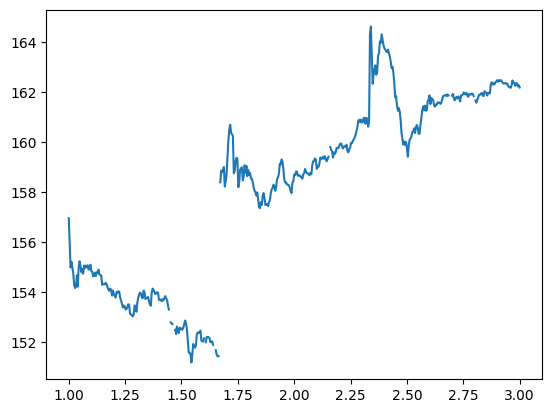

17

In [5]:

grid_point=linspace(1,3,n_total)
nan_ex=La_dinguerie.T['ZTS']
basis=B(knots=linspace(9.30,15.59,7),order=4)
fd(nan_ex)
Fdata_grid_with_NA=fd(grid_points=linspace(1,3,n_total),data_matrix=nan_ex)
Fdata_grid_with_NA.plot()
# Fdata_grid_with_NA.to_basis(basis).plot()
plt.show()
sum( nan_ex.isna())

In [209]:
La_dinguerie.shape
for i in range(len(La_dinguerie.values)):
    print(La_dinguerie.values[i].shape)

La_dinguerie.to_csv("Stock_table.csv",sep='\t',encoding="utf-8",index=False,na_rep="N/A")

(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)
(1170,)


In [202]:
from missforest.miss_forest import MissForest
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=200,n_jobs=-1)
Imputer=MissForest(regressor=regressor)

Imputer=MissForest(n_iter=3)
Imputed_data=Imputer.fit_transform(La_dinguerie)

 

ValueError: Found array with 0 sample(s) (shape=(0, 1169)) while a minimum of 1 is required.

In [201]:
def backfill_na(X):
    for i in range(X.shape[0]-1):
        for j in range(X.shape[1]-1):
            if X[i,j]==nan:
                X[i,j]=X[i,j-1],
    return X

test_backfill=backfill_na(La_dinguerie.values)

Imputed_bf=La_dinguerie.fillna(method="bfill")

sum(sum(Imputed_bf.fillna(method="mean").isna()))


ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got mean

In [189]:
# n_total=252
# Covariables=pd.read_csv("1_year_in_days_M.csv")

# # donnees_combinees[donnees_combinees.Symbole=="AAPL"].values[1741] 
# # donnees_combinees.Symbole
# names_materials=Covariables.Symbole.unique()

# raw_data_materials=Covariables.values[:,2:8].astype(float)
# # raw_data=Covariables.values[:,0:8]
# Z=torch.zeros(raw_data_materials.shape[0]//n_total,n_total,6,)
# for i in range(raw_data_materials.shape[0]//n_total):
#     Z[i,:,:]=torch.from_numpy(raw_data_materials[i*n_total:(i+1)*n_total])
#     # X[i,:,0]=i
# print(Z.shape)
# # Z=row_column_scaler(Z)
# # print(Z.shape)

In [188]:
names[[27, 301]]
where(names=='AMZN')
where(names=='NVDA')
# where(names=='')

(array([301], dtype=int64),)

In [186]:
X_na=torch.tensor(La_dinguerie.values).unsqueeze(2)
Granulator(X_na,granulation=1000)

tensor([[[171.1000, 171.1000, 171.1000,  ..., 171.1000, 171.1000, 171.1000]],

        [[ 94.8900,  94.8900,  94.8900,  ...,  94.8900,  94.8900,  94.8900]],

        [[299.3541, 299.3541, 299.3541,  ..., 299.3541, 299.3541, 299.3541]],

        ...,

        [[209.5700, 209.5700, 209.5700,  ..., 209.5700, 209.5700, 209.5700]],

        [[ 30.7510,  30.7510,  30.7510,  ...,  30.7510,  30.7510,  30.7510]],

        [[156.9650, 156.9650, 156.9650,  ..., 156.9650, 156.9650, 156.9650]]],
       device='cuda:0')

In [191]:

knots_train=4
knots_test=4
knots_total=concatenate([
        np.linspace(0,2,knots_train)
        ,np.linspace(2,3,knots_test)
        ])

# total_basis=B(knots=linspace(1,252,knots_total),order=3)
total_basis=B(knots=knots_total,order=4)
# Utilisez pandas pour lire le fichier CSV
donnees_combinees = pd.read_csv(csv_file_path)

donnees_combinees[donnees_combinees.Symbole=="MSFT"]
# donnees_combinees[donnees_combinees.Symbole=="AAPL"].values[1741] 
donnees_combinees.Symbole


raw_data=donnees_combinees.values[:,2:8].astype(float)
# raw_data=donnees_combinees.values[:,0:8]
# X=torch.zeros(raw_data.shape[0]//n_total,n_total,6,)
# for i in range(raw_data.shape[0]//n_total):
#     X[i,:,:]=torch.from_numpy(raw_data[i*n_total:(i+1)*n_total])
#     # X[i,:,0]=i
X=torch.tensor(Imputed_bf.values).unsqueeze(2)
print("X shape", X.shape)
# X=row_column_scaler(X)
print("index des actions d'intérêt:",argmax(names=='AMZN'),argmax(names=='INTC'),argmax(names=='NVDA'))

X shape torch.Size([458, 1170, 1])
index des actions d'intérêt: 27 207 301


In [192]:

X_of_interest=X[[27, 207,301]]
X=rm_tensor(X,[27, 207,301])
# X=torch.cat([X,Z],dim=0)
# X=torch.cat([X,Z])
ind=range(X.shape[0])
# X[:,:,5]=(X[:,:,5]-torch.mean(X[:,:,5]))/torch.std(X[:,:,5])
# for i in range(6):
#     X[:,:,i]=torch.Tensor(scale().fit_transform(X[:,:,i].cpu()))

minutes_total=n_total
minutes_futur=n_total-390*2
minutes_train=minutes_total-minutes_futur
grid_points_past=linspace(0,2,minutes_train)
grid_points_futur=linspace(2,3,minutes_futur)
grid_plot_y=linspace(2,3,minutes_futur)

grid_points_total=linspace(0,3,n_total)
Y=X[:,minutes_train-1:n_total-1,0].unsqueeze(2).unsqueeze(3).float().cuda()

# data_matrix_train=torch.cat([Z[:,:,4],X[:,:minutes_train,4]],dim=2).numpy()
# torch.cat([Z[:,:,4],X[:,:minutes_train,4]],dim=2)
# Z[:,:minutes_train,:].shape,X[:,:minutes_train,:].shape
# torch.cat([Z[:,:minutes_train,:],X[:,:minutes_train,:]],dim=2)

(455,) <class 'skfda.representation.grid.FDataGrid'>
(341, 1170, 1) (341, 780, 1)


ValueError: array must not contain infs or NaNs

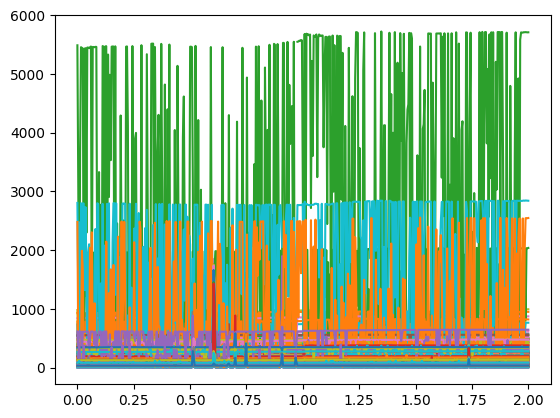

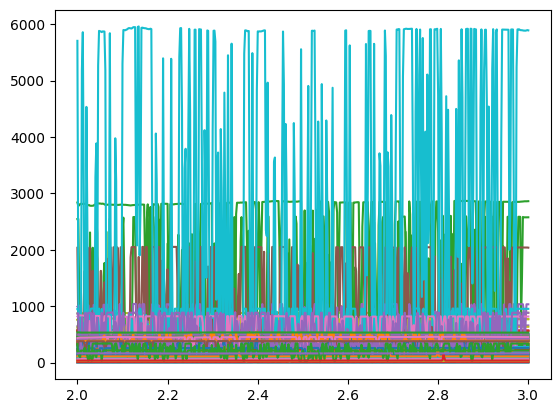

In [193]:


X_grid=fd(grid_points=grid_points_past,data_matrix=X[:,:minutes_train,0].numpy()).fillna(method="bfill")
X_grid_total=fd(grid_points=grid_points_total,data_matrix=X[:,:,0].numpy()).fillna(method="bfill")
X_grid_of_interest=fd(grid_points=grid_points_past,data_matrix=X_of_interest[:,:minutes_train,0].numpy()).fillna(method="bfill")
X_grid_total_of_interest=fd(grid_points=grid_points_total,data_matrix=X_of_interest[:,:,0].numpy()).fillna(method="bfill")
Y_grid=fd(grid_points=grid_points_futur,data_matrix=X[:,minutes_train-1:n_total-1,0].numpy()).fillna(method="bfill")
Y_grid_total=fd(grid_points=grid_points_futur,data_matrix=X[:,minutes_train-1:n_total-1,0].numpy()).fillna(method="bfill")

# x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X_grid,Y,shuffle=True)    
print(X_grid.shape,type(X_grid))
# # x_train,x_test,x_total_train,x_total_test,indices_train,indices_test=sklearn.model_selection.train_test_split(X_grid,X_grid_total,ind,shuffle=True)    
x_train,x_test,x_total_train,x_total_test,indices_train,indices_test,y_train_tensor,y_test_tensor=sklearn.model_selection.train_test_split(X_grid,X_grid_total,ind,Y,shuffle=True)    
x_train.data_matrix,X_grid_of_interest.data_matrix,x_total_train.data_matrix,x_total_test.data_matrix=x_train.data_matrix[:,:,0:1],X_grid_of_interest.data_matrix[:,:,0:1],x_total_train.data_matrix[:,:,0:1],x_total_test.data_matrix[:,:,0:1]
print(x_total_train.data_matrix.shape,x_train.data_matrix.shape)
# y_train=torch.tensor(x_total_train.fillna(method="bfill").to_basis(basis=total_basis).coefficients).unsqueeze(2).unsqueeze(3).float().cuda()
# y_test=torch.tensor(x_total_test.fillna(method="bfill").to_basis(basis=total_basis).coefficients).unsqueeze(2).unsqueeze(3).float().cuda()
# names_train=names[indices_train]
# names_test=names[indices_test]
# X=X[:,:n_total,4].permute(0,2,1).float().cuda()
# x_train_tensor,X_grid_of_interest_tensor,y_train_tensor,y_test_tensor=sklearn.model_selection.train_test_split(X,Y,shuffle=True)    


x_train.plot()
Y_grid.plot()
X_grid_total.to_basis(total_basis).plot()
plt.show()
# [Y.shape,X.shape,
# #  x_train_tensor.shape,
# #  X_grid_of_interest_tensor.shape
#  y_train.shape,

x_total_train
#  ]

array(['AAPL', 170.72999572753906], dtype=object)

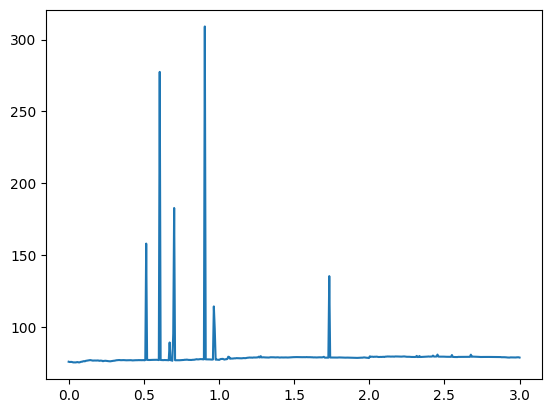

In [195]:
X_grid_total[7].plot()
Close.values[7]

In [196]:
n_knots_train=knots_train

##Choix du nombre d'epochs 
n_epoch=2
opt='SGD'
##Création des hyperparamètres:
basis_train=B(knots=linspace(1,minutes_train,n_knots_train),order=4)
param1=HyperParameters(n_epochs=n_epoch,
                        granulation=7500,
    # basis=MultiBasis([
    #     # B(knots=linspace(1,minutes_train,n_knots),order=4),
    #     # B(knots=linspace(1,minutes_train,n_knots),order=4),
    #     # B(knots=linspace(1,minutes_train,n_knots),order=4),
    #     # B(knots=linspace(1,minutes_train,n_knots),order=4),
    #     # B(knots=linspace(1,minutes_train,n_knots),order=4),
    #     # B(knots=linspace(1,minutes_train,n_knots),order=4)
    #     # total_basis,
    #     basis_train,
    #     ]
    #     ),
    #     # Smoothing_mode="inter",
    n_conv_in=8, n_conv_in2=64, n_conv_in3=128,n_conv_out=2, n_Flat_out=128,
    stride_1=50, stride_2=1, stride_3=1,n_knots=8,order=3,
    stride_pool_1=2, stride_pool_2=2, stride_pool_3=2,
    kernel_size_1=55,  kernel_size_2=3, kernel_size_3=4,
    kernel_size_pool_1=5, kernel_size_pool_2=2, kernel_size_pool_3=3,
    dilation_1=75, dilation_2=1, dilation_3=1,
    dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
    padding_1=2, padding_2=2, padding_3=2,
    n_channel=1,
    padding_pool_1=1, padding_pool_2=1, padding_pool_3=1,
    opt=opt, lr=0.00089, loss=nn.MSELoss(),activation=nn.Identity(),negative_slope=0.17,
    derivative=[0,1,2],)
param_mlp=HyperParameters(n_conv_in=256,n_conv_in2=64, n_conv_in3=128,n_conv_out=2, n_Flat_out=256,opt=opt,
                          lr=0.00089
                          )



In [197]:
hyperparams=param1
class Market_predictor(nn.Module):
    def __init__(self,channels,):
        super(Market_predictor,self).__init__()
        self.entry_layer=nn.Sequential(
            TSConv1d_hyperparam(hyperparameter=param1)
        )
        self.conv_block=nn.Sequential(
            nn.MaxPool1d(kernel_size=hyperparams.kernel_size_pool_1,stride=hyperparams.stride_pool_1,padding=hyperparams.padding_pool_1,dilation=hyperparams.dilation_pool_1),
            nn.BatchNorm1d(hyperparams.n_conv_in),
            nn.LeakyReLU(hyperparams.negative_slope),
            nn.Dropout(p=hyperparams.DropOut),

            nn.Conv1d(param1.n_conv_in,param1.n_conv_in2,kernel_size=hyperparams.kernel_size_2,stride=hyperparams.stride_2,dilation=hyperparams.dilation_2,padding=hyperparams.padding_2),
            nn.BatchNorm1d(hyperparams.n_conv_in2),
            nn.LeakyReLU(hyperparams.negative_slope),
            nn.Dropout(p=hyperparams.DropOut),

            nn.MaxPool1d(kernel_size=hyperparams.kernel_size_pool_2,stride=hyperparams.stride_pool_2,padding=hyperparams.padding_pool_2,dilation=hyperparams.dilation_pool_2),
            nn.BatchNorm1d(hyperparams.n_conv_in2),
            nn.LeakyReLU(hyperparams.negative_slope),
            nn.Dropout(p=hyperparams.DropOut),

            nn.Conv1d(param1.n_conv_in2,param1.n_conv_in3,kernel_size=hyperparams.kernel_size_3,stride=hyperparams.stride_3,dilation=hyperparams.dilation_3,padding=hyperparams.padding_3),
            nn.BatchNorm1d(hyperparams.n_conv_in3),
            nn.LeakyReLU(hyperparams.negative_slope),
            nn.Dropout(p=hyperparams.DropOut),
            
            nn.MaxPool1d(kernel_size=hyperparams.kernel_size_pool_3,stride=hyperparams.stride_pool_3,padding=hyperparams.padding_pool_3,dilation=hyperparams.dilation_pool_3),
            nn.BatchNorm1d(hyperparams.n_conv_in3),
            nn.LeakyReLU(hyperparams.negative_slope),
            nn.Dropout(p=hyperparams.DropOut),
        )
        self.forecaster=nn.Sequential(
            nn.Flatten(),
            nn.Linear(hyperparams.n_conv_in3*conv_total_out(hyperparams),hyperparams.n_Flat_out),
            nn.BatchNorm1d(hyperparams.n_Flat_out),
            nn.LeakyReLU(hyperparams.negative_slope),
            nn.Linear(hyperparams.n_Flat_out,total_basis.n_basis),

        )

    def forward(self,x):
        TSC_out=self.entry_layer(x)
        conv_out=self.conv_block(TSC_out)
        forecast=self.forecaster(conv_out).float().unsqueeze_(2).unsqueeze_(3)
        return forecast

        


In [198]:
lstm=Compile_class(model_class="lstm",hyperparams=param1,output_size=total_basis.n_basis,x_train=x_train)
tsc=Compile_class(model_class="TSC",hyperparams=param1,output_size=total_basis.n_basis,x_train=x_train)
mlp=Compile_class(model_class='MLP',hyperparams=param_mlp,output_size=total_basis.n_basis,x_train=x_train)
market_predictor=Market_predictor(channels=1).cuda()

In [199]:

# x_train_close=x_train_tensor[:,,:].unsqueeze(1)
# X_close=X[:,4,:].unsqueeze(1)
optimizer=optim.Adam(tsc.parameters(),
                     lr=0.0001)
optimizer_market=optim.Adam(market_predictor.parameters(),
                     lr=0.0001)
optimizer_lstm=optim.Adam(lstm.parameters(),
                     lr=0.0001)
optimizer_mlp=optim.Adam(mlp.parameters(),
                     lr=0.0001)

loss=hyperparams.loss

In [200]:
eval_train=200
eval_points=linspace(0,3,200)
def market_loss(y_hat,y_test,total_basis=total_basis,eval_points=eval_points):

    basis_eval_ordre_0=total_basis(eval_points=eval_points,derivative=0)
    basis_eval_ordre_1=total_basis(eval_points=eval_points,derivative=1)
    basis_fc_ordre_1=torch.from_numpy(basis_eval_ordre_0).float().cuda()
    basis_fc_ordre_0=torch.from_numpy(basis_eval_ordre_1).float().cuda()
    # basis_fc_test_ordre_1=torch.from_numpy(basis_eval_ordre_0).float().cuda()
    # basis_fc_test_ordre_0=torch.from_numpy(basis_eval_ordre_1).float().cuda()
    recons_ordre_0=torch.matmul(y_hat[:,:,0,0],basis_fc_ordre_0[:,:,0])
    recons_ordre_1=torch.matmul(y_hat[:,:,0,0],basis_fc_ordre_1[:,:,0])
    recons_ordre_test_0=torch.matmul(y_test[:,:,0,0],basis_fc_ordre_0[:,:,0])
    recons_ordre_test_1=torch.matmul(y_test[:,:,0,0],basis_fc_ordre_1[:,:,0])
    # coefs_derive=torch.from_numpy()
    
    loss_entre_lissages=nn.MSELoss()(recons_ordre_0[:,eval_train-1:],
                             recons_ordre_test_0[:,eval_train-1:])
    loss_reel=nn.MSELoss()(recons_ordre_0[:,eval_train-1:],
                             y_test_tensor)
    loss_entre_lissages_derive=nn.MSELoss()(recons_ordre_1[:,eval_train-1:],
                             recons_ordre_test_1[:,eval_train-1:])
    loss_coefs=nn.MSELoss()(y_hat,y_test)
    
    loss_sign_derive= nn.CrossEntropyLoss()(torch.sign(recons_ordre_1[:,eval_train-1:]),
                                            torch.sign(recons_ordre_test_1[:,eval_train-1:]))
    # loss_coefs_derive=nn.MSELoss()(y_hat,)
    
    # loss_weights=torch.tensor([0.2,0.2,0.2,0.2,0.2])                
    
    
    
    # loss_cat=torch.cat([
    #     loss_sign_derive,
    #     loss_coefs,
    #     loss_entre_lissages_derive,
    #     loss_entre_lissages,
    #     # loss_reel,
    #     ])
    # loss_totale=torch.sqrt(torch.dot(loss_cat,loss_weights))
    loss_totale=torch.sqrt(
        0.1*loss_reel+
        0.2*loss_entre_lissages_derive+
        0.2*loss_entre_lissages+
        0.4*loss_coefs+
        0.8*loss_sign_derive
        )
    
    
    
    return loss_totale
market_loss(mlp(x_test),y_test)

c:\Users\Utilisateur\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([114, 390, 1, 1])) that is different to the input size (torch.Size([114, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(nan, device='cuda:0', grad_fn=<SqrtBackward0>)

In [ ]:
def train(n_epochs, module, optimizer, batch_size,loss=market_loss,x_test=x_test,y_test=y_test):
    testing_acc=torch.tensor([0])

    for epoch in tqdm(range(n_epochs)):
        train_loss = torch.tensor(0).cuda().long()
        
        # Mélanger les données d'entraînement
        indices = list(range(len(x_train)))
        random.shuffle(indices)
        
        batch_index = 0  # Indice de batch
        
        for i in range(int(len(x_train) / batch_size)):
            # Obtenir les indices des données mélangées
            batch_indices = indices[batch_index:batch_index+batch_size]
            functions_train = x_train[batch_indices]
            # y_coefs_batch = X_grid_total[batch_indices]
            # labels_train = torch.tensor(y_coefs_batch.to_basis(total_basis).coefficients).unsqueeze(2).unsqueeze(3).float().cuda()
            labels_train =y_train[batch_indices]
            # touche_train=torch.Tensor(functions_train.data_matrix[:,minutes_train-1,:]).float().cuda()
            optimizer.zero_grad()
            output = module(functions_train)
            loss_value = loss(output,labels_train)
        
            loss_value.backward()
            optimizer.step()
            train_loss += loss_value.long()
            batch_index += batch_size  # Passer au prochain batch
            
        if len(unique(y_train.cpu()))<y_train.shape[0]//2:
            # accuracy_training=((torch.sum(torch.argmax(module(x_train),dim=1)==y_train)/x_train.shape[0])*100).cpu().unsqueeze(0)
            accuracy=((torch.sum(torch.argmax(module(x_test),dim=1)==y_test)/x_test.shape[0])*100).cpu().unsqueeze(0)
            testing_acc=torch.cat([testing_acc,accuracy],dim=0)
            # training_acc=torch.cat([training_acc,accuracy_training],dim=0)
        else:
            # mse_loss_train=nn.MSELoss()(module(x_train),y_train).unsqueeze(0).cpu()
            # mse_loss_test=torch.sqrt(nn.MSELoss()(module(x_test),y_test)).unsqueeze(0).cpu()
            # testing_acc=torch.cat([testing_acc,mse_loss_test.cpu()],dim=0).cpu()
            loss_test=loss(module(x_test),y_test=y_test).unsqueeze(0).cpu()
            testing_acc=torch.cat([testing_acc,loss_test.cpu()],dim=0).cpu()
            # training_acc=torch.cat([training_acc,mse_loss_train.cpu()],dim=0).cpu()
        gc.collect()
        torch.cuda.empty_cache()


    return testing_acc.detach().cpu()


In [ ]:
n_epochs=140
batch_size=130
train_tracker_market_p =train(module=market_predictor,optimizer=optimizer_market,
                     n_epochs=n_epochs,loss=market_loss,batch_size=batch_size,
                    #  y_test= torch.tensor(.to_basis(total_basis).coefficients).unsqueeze(2).unsqueeze(3).float().cuda()
                     )
train_tracker_tsc =train(module=tsc,optimizer=optimizer,
                     n_epochs=n_epochs,loss=market_loss,batch_size=batch_size)
                    #  y_test= torch.tensor(.to_basis(total_basis).coefficients).unsqueeze(2).unsqueeze(3).float().cuda()
train_tracker_lstm =train(module=lstm,optimizer=optimizer_lstm,
                     n_epochs=n_epochs,loss=market_loss,batch_size=batch_size)
train_tracker_mlp=train(module=mlp,optimizer=optimizer_mlp,
                     n_epochs=n_epochs,loss=market_loss,batch_size=batch_size,
                     )


  0%|          | 0/140 [00:00<?, ?it/s]c:\Users\Utilisateur\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([114, 390, 1, 1])) that is different to the input size (torch.Size([130, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 140/140 [00:21<00:00,  6.44it/s]


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21032\1182459330.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_train.show()


[tensor(135), tensor(124), tensor(139), tensor(134)]

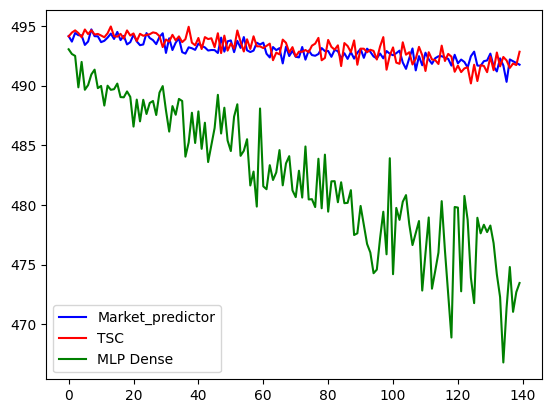

In [46]:
fig_train,ax_train=plt.subplots()
ax_train.plot(train_tracker_market_p[1:],color="blue",label="Market_predictor")
ax_train.plot(train_tracker_tsc[1:],color="red",label="TSC")
# ax_train.plot(train_tracker_lstm[1:],color="magenta",label="lstm")
ax_train.plot(train_tracker_mlp[1:],color="green",label="MLP Dense ")
ax_train.legend()
fig_train.show()
[
torch.argmin(train_tracker_market_p[1:]),
torch.argmin(train_tracker_tsc[1:]),
torch.argmin(train_tracker_lstm[1:]),
torch.argmin(train_tracker_mlp[1:]),
]

In [ ]:
market_loss(mlp(x_test),y_test=y_test)

tensor(321.0917, device='cuda:0', grad_fn=<SqrtBackward0>)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21032\2618181363.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21032\2618181363.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_reel.show()


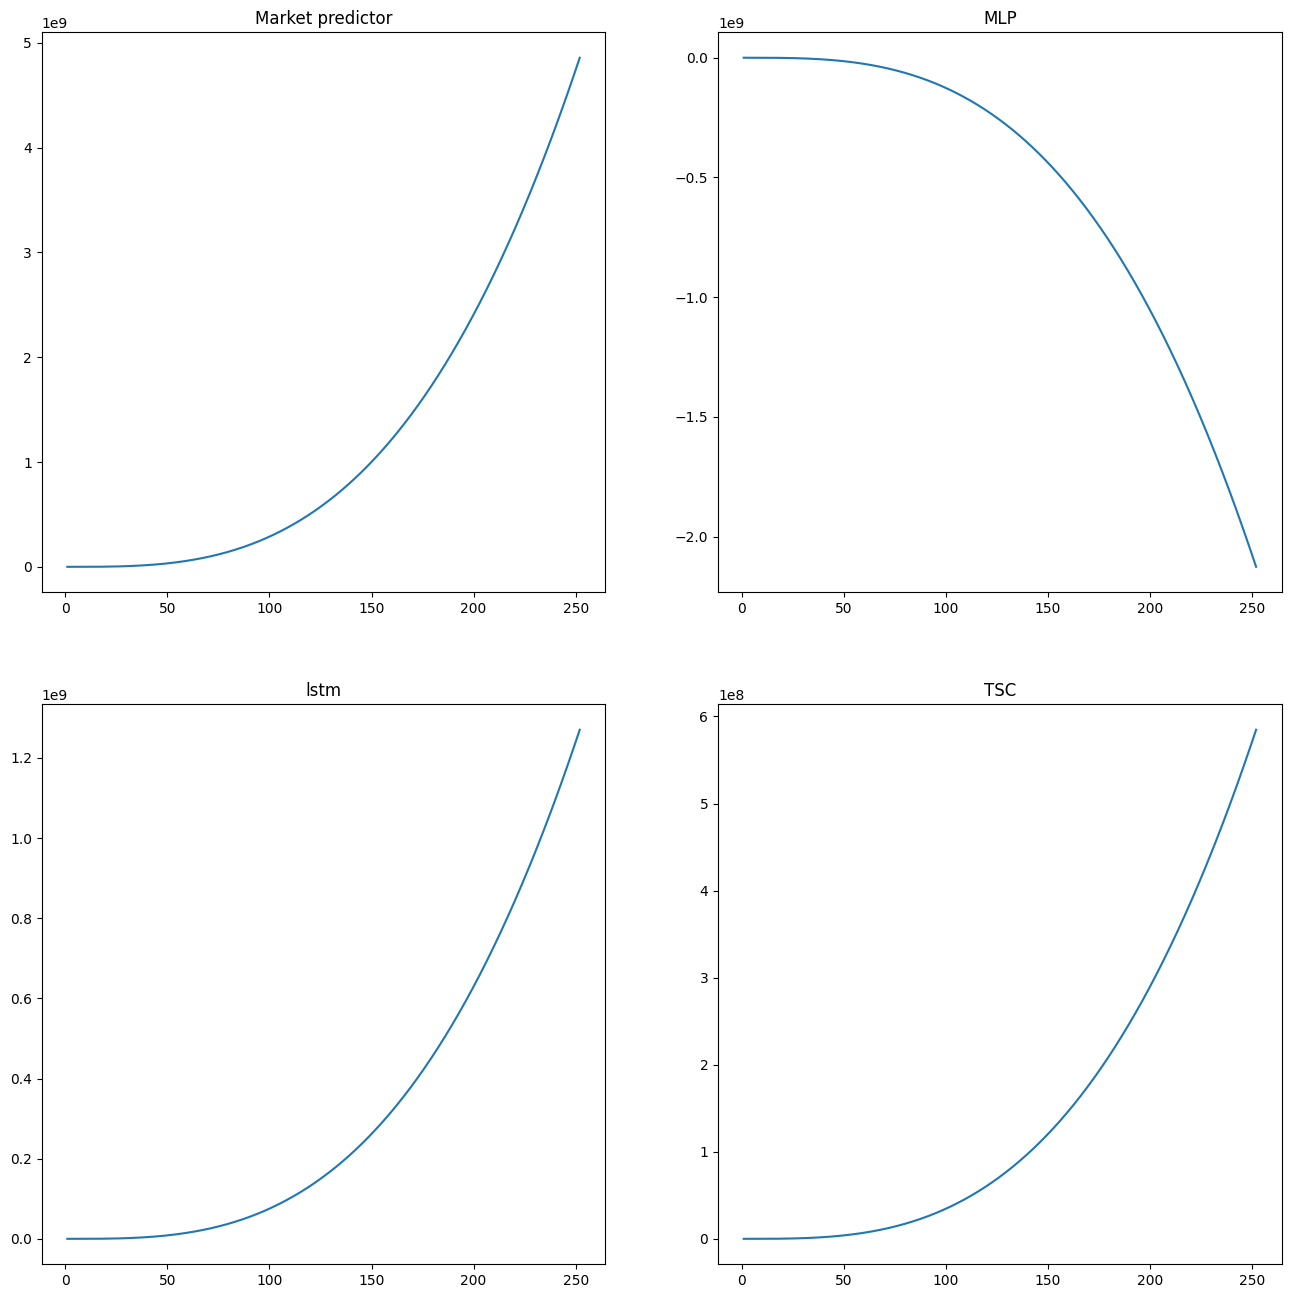

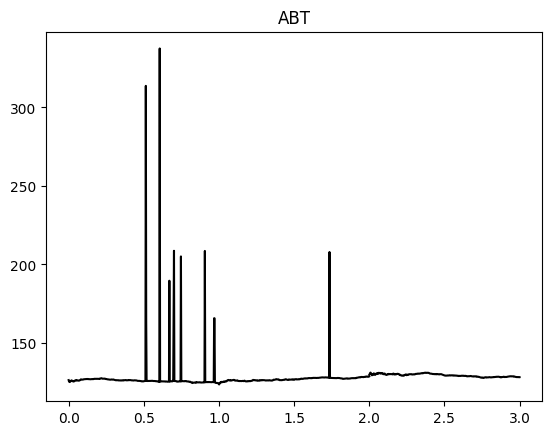

In [36]:
eval_points=linspace(1,252,2520)


y_hat=mlp(x_test)[:,:,0,0]
y_hat_lstm=lstm(x_test)[:,:,0,0]
y_hat_tsc=tsc(x_test)[:,:,0,0]
y_hat_market=market_predictor(x_test)[:,:,0,0]
# k=np.random.randint(0)
k=1
basis_eval=total_basis(eval_points=eval_points)
basis_fc=torch.from_numpy(basis_eval).float().cuda()
recons=torch.matmul(y_hat,basis_fc[:,:,0])
recons_test=torch.matmul(y_hat,basis_fc[:,:,0])
recons_test_lstm=torch.matmul(y_hat_lstm,basis_fc[:,:,0])
recons_test_tsc=torch.matmul(y_hat_tsc,basis_fc[:,:,0])
recons_test_market=torch.matmul(y_hat_market,basis_fc[:,:,0])
# x_test[k].plot()
# print("Réalité")
# skfda.FDataBasis(basis=total_basis,coefficients=y_test[k,:,0,0].detach().cpu()).plot()
moyenne=mean(x_test.data_matrix[k,:])
# x_test_norm=(x_test.data_matrix[k]-moyenne)/var(x_test.data_matrix[k])
fig,ax=plt.subplots(2,2,figsize=(16,16))
ax[0,0].plot(eval_points,torch.t(recons_test_market[k]).detach().cpu(),label="market_predictor de cristale")
ax[0,1].plot(eval_points,torch.t(recons_test[k]).detach().cpu(),label="mlp")
ax[1,0].plot(eval_points,torch.t(recons_test_lstm[k]).detach().cpu(),label="lstm")
ax[1,1].plot(eval_points,torch.t(recons_test_tsc[k]).detach().cpu(),label="tsc")
ax[0,0].set_title("Market predictor")
ax[0,1].set_title("MLP")
ax[1,1].set_title("TSC")
ax[1,0].set_title("lstm")
# ax[0].legend()
fig_reel,ax_reel=plt.subplots()
ax_reel.plot(grid_points_past,x_test.data_matrix[k,:,0],color="black")
ax_reel.plot(grid_points_futur,x_total_test.data_matrix[k,minutes_train:n_total],color="black")
ax_reel.set_title(names[k])
# ax[0].set_ylim(0,200)
# ax[1].set_ylim(0,200)
fig.show()
fig_reel.show()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4764\3613666863.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4764\3613666863.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_reel.show()


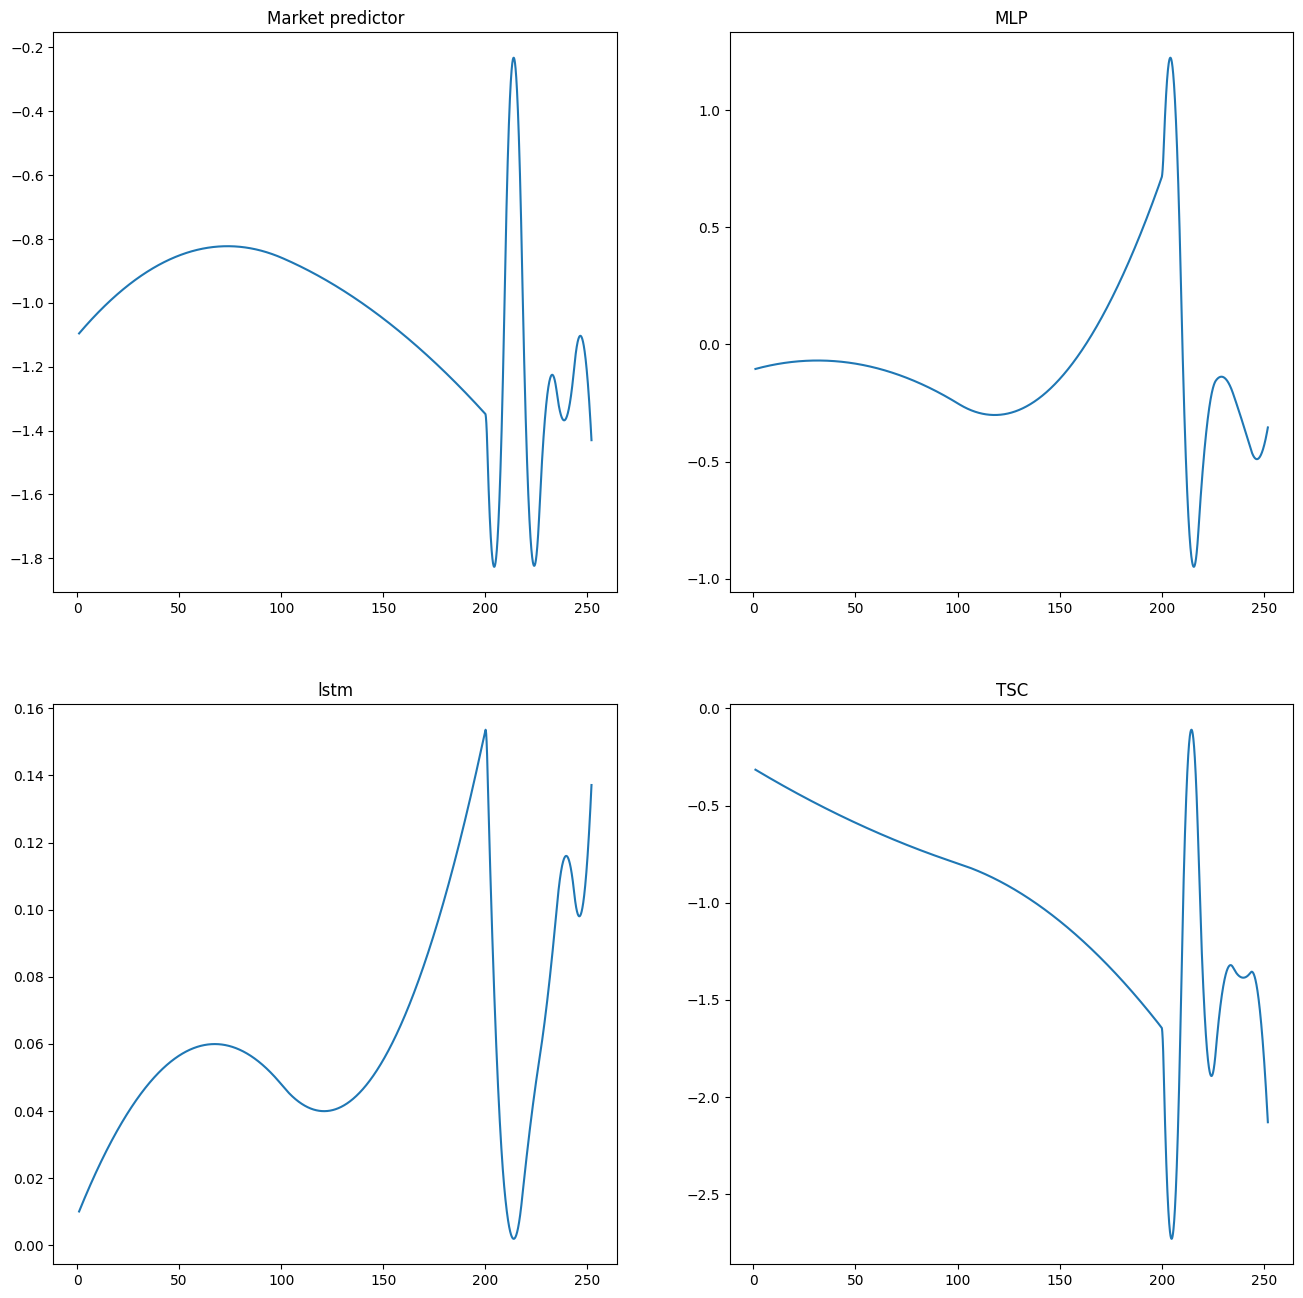

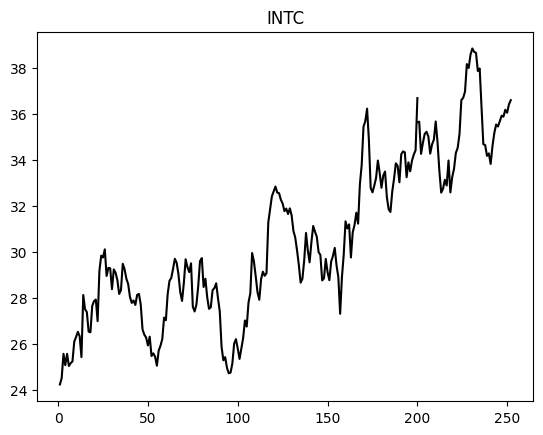

In [ ]:
eval_points=linspace(1,252,7500)
y_hat=mlp(X_grid_of_interest)[:,:,0,0]
y_hat_lstm=lstm(X_grid_of_interest)[:,:,0,0]
y_hat_tsc=tsc(X_grid_of_interest)[:,:,0,0]
y_hat_market=market_predictor(X_grid_of_interest)[:,:,0,0]
k=np.random.randint(2)

basis_eval=total_basis(eval_points=eval_points)
basis_fc=torch.from_numpy(basis_eval).float().cuda()
recons=torch.matmul(y_hat,basis_fc[:,:,0])
recons_test=torch.matmul(y_hat,basis_fc[:,:,0])
recons_test_lstm=torch.matmul(y_hat_lstm,basis_fc[:,:,0])
recons_test_tsc=torch.matmul(y_hat_tsc,basis_fc[:,:,0])
recons_test_market=torch.matmul(y_hat_market,basis_fc[:,:,0])
# x_test[k].plot()
# print("Réalité")
# skfda.FDataBasis(basis=total_basis,coefficients=y_test[k,:,0,0].detach().cpu()).plot()

fig,ax=plt.subplots(2,2,figsize=(16,16))
ax[0,0].plot(eval_points,torch.t(recons_test_market[k]).detach().cpu(),label="market_predictor de cristale")
ax[0,1].plot(eval_points,torch.t(recons_test[k]).detach().cpu(),label="mlp")
ax[1,0].plot(eval_points,torch.t(recons_test_lstm[k]).detach().cpu(),label="lstm")
ax[1,1].plot(eval_points,torch.t(recons_test_tsc[k]).detach().cpu(),label="tsc")
ax[0,0].set_title("Market predictor")
ax[0,1].set_title("MLP")
ax[1,1].set_title("TSC")
ax[1,0].set_title("lstm")

fig_reel,ax_reel=plt.subplots()
ax_reel.plot(grid_points_past,X_grid_of_interest.data_matrix[k,:,0],color="black")
ax_reel.plot(grid_points_futur,X_grid_total_of_interest.data_matrix[k,minutes_train:n_total],color="black")
ax_reel.set_title(names_of_interest[k])

fig.show()
fig_reel.show()

In [ ]:
eval_points=linspace(1,252,2520)


y_hat=mlp(X_grid_of_interest)[:,:,0,0]
y_hat_lstm=lstm(X_grid_of_interest)[:,:,0,0]
y_hat_tsc=tsc(X_grid_of_interest)[:,:,0,0]
y_hat_market=market_predictor(X_grid_of_interest)[:,:,0,0]
k=np.random.randint(2)

basis_eval=total_basis(eval_points=eval_points)
basis_fc=torch.from_numpy(basis_eval).float().cuda()
recons=torch.matmul(y_hat,basis_fc[:,:,0])
recons_test=torch.matmul(y_hat,basis_fc[:,:,0])
recons_test_lstm=torch.matmul(y_hat_lstm,basis_fc[:,:,0])
recons_test_tsc=torch.matmul(y_hat_tsc,basis_fc[:,:,0])
recons_test_market=torch.matmul(y_hat_market,basis_fc[:,:,0])
# x_test[k].plot()
# print("Réalité")
# skfda.FDataBasis(basis=total_basis,coefficients=y_test[k,:,0,0].detach().cpu()).plot()

fig,ax=plt.subplots(2,2,figsize=(16,16))
ax[0,0].plot(eval_points[2000:],torch.t(recons_test_market[k,2000:,]).detach().cpu(),label="market_predictor de cristale")
ax[0,1].plot(eval_points[2000:],torch.t(recons_test[k,2000:,]).detach().cpu(),label="mlp")
ax[1,0].plot(eval_points[2000:],torch.t(recons_test_lstm[k,2000:,]).detach().cpu(),label="lstm")
ax[1,1].plot(eval_points[2000:],torch.t(recons_test_tsc[k,2000:,]).detach().cpu(),label="tsc")
ax[0,0].set_title("Market predictor")
ax[0,1].set_title("MLP")
ax[1,1].set_title("TSC")
ax[1,0].set_title("lstm")
# ax[0].legend()
fig_reel,ax_reel=plt.subplots()
# ax_reel.plot(grid_points_past,X_grid_of_interest.data_matrix[k,:,0],color="black")
ax_reel.plot(grid_points_futur,X_grid_total_of_interest.data_matrix[k,minutes_train:n_total],color="black")
ax_reel.set_title(names_of_interest[k])
# ax[0].set_ylim(0,200)
# ax[1].set_ylim(0,200)
fig.show()
fig_reel.show()

NameError: name 'mlp' is not defined

In [ ]:
sp500_companies = [
    'AAPL', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
    'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD',
    'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB',
    'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB',
    'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA',
    'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS',
    'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA',
    'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX',
    'EIX', 'EL', 'EMN', 'EMR', 'ENPH', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR',
    'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLIR', 'FMC', 'FRT', 'FTNT', 'FTV', 'GD',
    'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN',
    'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM',
    'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW',
    'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO',
    'KR', 'KSU', 'L', 'LB', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUMN',
    'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK',
    'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRO', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU',
    'MXIM', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA',
    'NVR', 'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PBCT', 'PCAR',
    'PEAK', 'PEG', 'PENN', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG',
    'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PTC', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI',
    'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB',
    'SLG', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAK',
    'TAP', 'TDG', 'TDY', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TIF', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO',
    'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'U', 'UA', 'UAA', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNM', 'UNP', 'UPS',
    'URI', 'USB', 'V', 'VAR', 'VFC', 'VIAC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA',
    'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XLNX', 'XOM',
    'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS'
]

# Vérifier qu'il y a bien 500 entreprises dans la liste
len(sp500_companies)
